# Machine Learning : Programming Exercise 1

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import sys

from plotData import plotData
from computeCost import computeCost
from gradientDescent import gradientDescent
from featureNormalize import featureNormalize
from gradientDescentMulti import gradientDescentMulti
from computeCostMulti import computeCostMulti
from normalEqn import normalEqn

## 1. Linear regression with one variable
### 1.1 Plotting the data

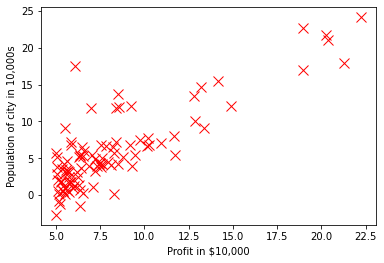

In [19]:
data = np.loadtxt('C:\\Users\\Karim\\Desktop\\Linear-Regression\\with-Python\\ex1data1.txt', delimiter =",")

X = data[:, 0] # X refers to the population size in 10,000s
y = data[:, 1] # y refers to the profit in $10,000s

m = y.size # number of training examples

y = y.reshape((m,1)) # make y a matrix (m x 1)

# plot
plotData(X, y)
plt.show(block=False)

### 1.2 Gradient Descent


Testing the cost function ...

With theta = [0  0]
Cost computed =  32.072733877455676 

Expected cost value 32.07


With theta = [-1  2]
Cost computed =  54.24245508201238 

Expected cost value 54.24


Running Gradient Descent ...

theta before for (2, 1)
Theta found by gradient descent:


 [[-3.63029144]
 [ 1.16636235]]
Expected theta values

 -3.6303
  1.1664




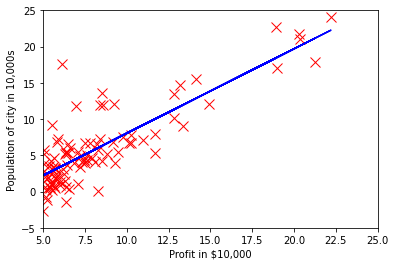

For population = 35,000, we predict a profit of f
 [[4519.7678677]]
For population = 70,000, we predict a profit of f
 [[45342.45012945]]


In [20]:
X = np.c_[np.ones((m, 1)), X] # Add a column of ones to X
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

print("\nTesting the cost function ...\n")
# Compute and display initial cost
J = computeCost(X, y, theta)
print("With theta = [0  0]\nCost computed = ", J, "\n")
print("Expected cost value 32.07\n")

# Further testing of the cost function
J = computeCost(X, y, np.array([[-1] , [2]]))
print("\nWith theta = [-1  2]\nCost computed = ", J, "\n")
print("Expected cost value 54.24\n")


print("\nRunning Gradient Descent ...\n")
# Run gradient descent
J_history, theta = gradientDescent(X, y, theta, alpha, iterations)

# Print the theta found by gradient descent
print("Theta found by gradient descent:\n")
print("\n", theta)
print("Expected theta values\n")
print(" -3.6303\n  1.1664\n\n")

# Plot the linear fit
plt.plot(X, y,  linestyle='None', color='red', marker='x', markersize=10, label="Training data")
plt.xlabel('Profit in $10,000')
plt.ylabel('Population of city in 10,000s')
plt.plot(X[:,1], np.dot(X, theta), color = 'blue', label="Linear regression")
plt.draw()
plt.axis([5, 25, -5, 25])
plt.show(block=False)

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([[1, 3.5]]), theta)
print("For population = 35,000, we predict a profit of f\n", predict1*10000)
predict2 = np.dot(np.array([[1, 7]]), theta)
print("For population = 70,000, we predict a profit of f\n", predict2*10000)

### 1.3 Visualizing J

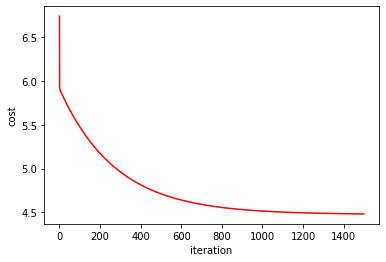

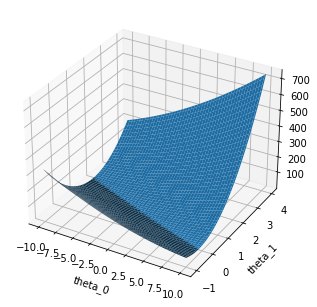

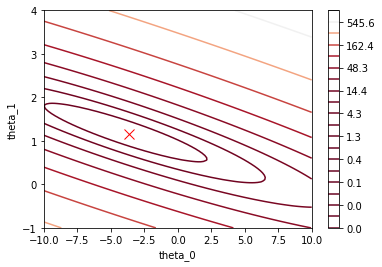

In [21]:
plt.figure(2) # new window
plt.plot(np.arange(0,iterations), J_history, linestyle='solid', color='red')
plt.xlabel("iteration")
plt.ylabel("cost")


plt.show(block = False)

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.size, theta0_vals.size))

# Fill out J_vals
for i in range (theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i,j] = computeCost(X, y, t)


# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T
# Surface plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
A,B = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(A, B, J_vals)
plt.xlabel('theta_0') 
plt.ylabel('theta_1')
plt.show(block=False)

# Contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.figure(4)
plt.contour(A, B, J_vals, np.logspace(-2, 3, 20), cmap='RdGy')
plt.colorbar()
plt.xlabel('theta_0') 
plt.ylabel('theta_1')
plt.plot(theta[0], theta[1], linestyle='None', color='red', marker='x', markersize=10, label="Optimum value of theta")
plt.draw()
plt.show(block=False)

## 2. Linear regression with multiple variables
### 2.1 Feature Normalization

In [22]:
data = np.loadtxt('C:\\Users\\Karim\\Desktop\\Linear-Regression\\with-Python\\ex1data2.txt', delimiter =",")

X = data[:, 0:2]
y = data[:, 2]

m = y.size # number of training examples

y = y.reshape((m,1)) # make y a matrix (m x 1)

# Scale features and set them to zero mean

X, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = np.c_[np.ones((m, 1)), X] # Add a column of ones to x

### 2.2 Gradient Descent

Running gradient descent ...



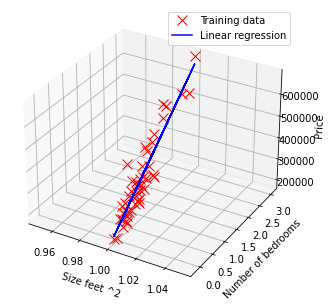

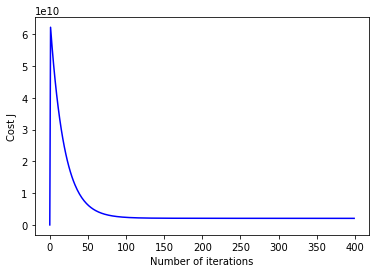

Theta computed from gradient descent: 


 [[ 120009.23670485]
 [ 148523.18318162]
 [-104847.7651808 ]]


Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 [[295844.67404394]]


In [23]:
print("Running gradient descent ...\n")

# Some gradient descent settings
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))

J_history, theta = gradientDescentMulti(X, y, theta, alpha, num_iters)


# 3D plot data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

A = X[:,0].reshape((m))
B = X[:,1].reshape((m))
C = y.reshape(m)

training_data_plot, = ax.plot3D(A, B, zs=C, linestyle='None', color='red', marker='x', markersize=10, label="Training data")
ax.set_xlabel("Size feet ^2")
ax.set_ylabel('Number of bedrooms')
ax.set_zlabel('Price')


C = np.dot(X, theta).reshape(m)

# Plot the linear fit
linea_regression_plot, = ax.plot3D(A, B, zs=C, color = 'blue', label="Linear regression")
plt.legend(handles=[training_data_plot, linea_regression_plot])
plt.show(block=False)

# Plot the convergence graph
plt.figure(2) #new window
plt.plot(np.arange(0,num_iters), J_history, linestyle='solid', color='blue')
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")

plt.show()


# Display gradient descent's result
print("Theta computed from gradient descent: \n")
print("\n", theta)
print("\n")



# Estimate the price of a 1650 sq-ft, 3 br house
normaliz_test_data = np.divide(np.array([[1650, 3]]) - mu, sigma)
price = np.dot(np.c_[1, normaliz_test_data] , theta)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n", price)

### 2.3 Normal Equations

In [24]:
print("Solving with normal equations...\n")

# Load Data
data = np.loadtxt('C:\\Users\\Karim\\Desktop\\Linear-Regression\\with-Python\\ex1data2.txt', delimiter =",")
X = data[:, 0:2]
y = data[:, 2]
m = y.size # number of training examples
y = y.reshape((m,1)) # make y a matrix (m x 1)


# Add intercept term to X
X = np.c_[np.ones((m, 1)), X] # Add a column of ones to x

# Calculate the parameters from the normal equation
theta = normalEqn(X, y)

# Display normal equation's result
print("Theta computed from the normal equations: \n")
print("\n", theta)
print("\n")


#Estimate the price of a 1650 sq-ft, 3 br house
price = np.dot(np.array([[1, 1650, 3]]), theta)
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n", price)

Solving with normal equations...

shape theta (3, 1)
Theta computed from the normal equations: 


 [[89597.90954355]
 [  139.21067402]
 [-8738.01911255]]


Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 [[293081.46433497]]
